Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del ítem 1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.
Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io, color, measure

# **Desarrollo**
Para empezar analicemos cual es la mejor manera para dar con un match para cada imagen del dataset, esto nos va a dar informacion importante para poder luego generalizar el template matching a todas las imagenes

# **Imagen 1**

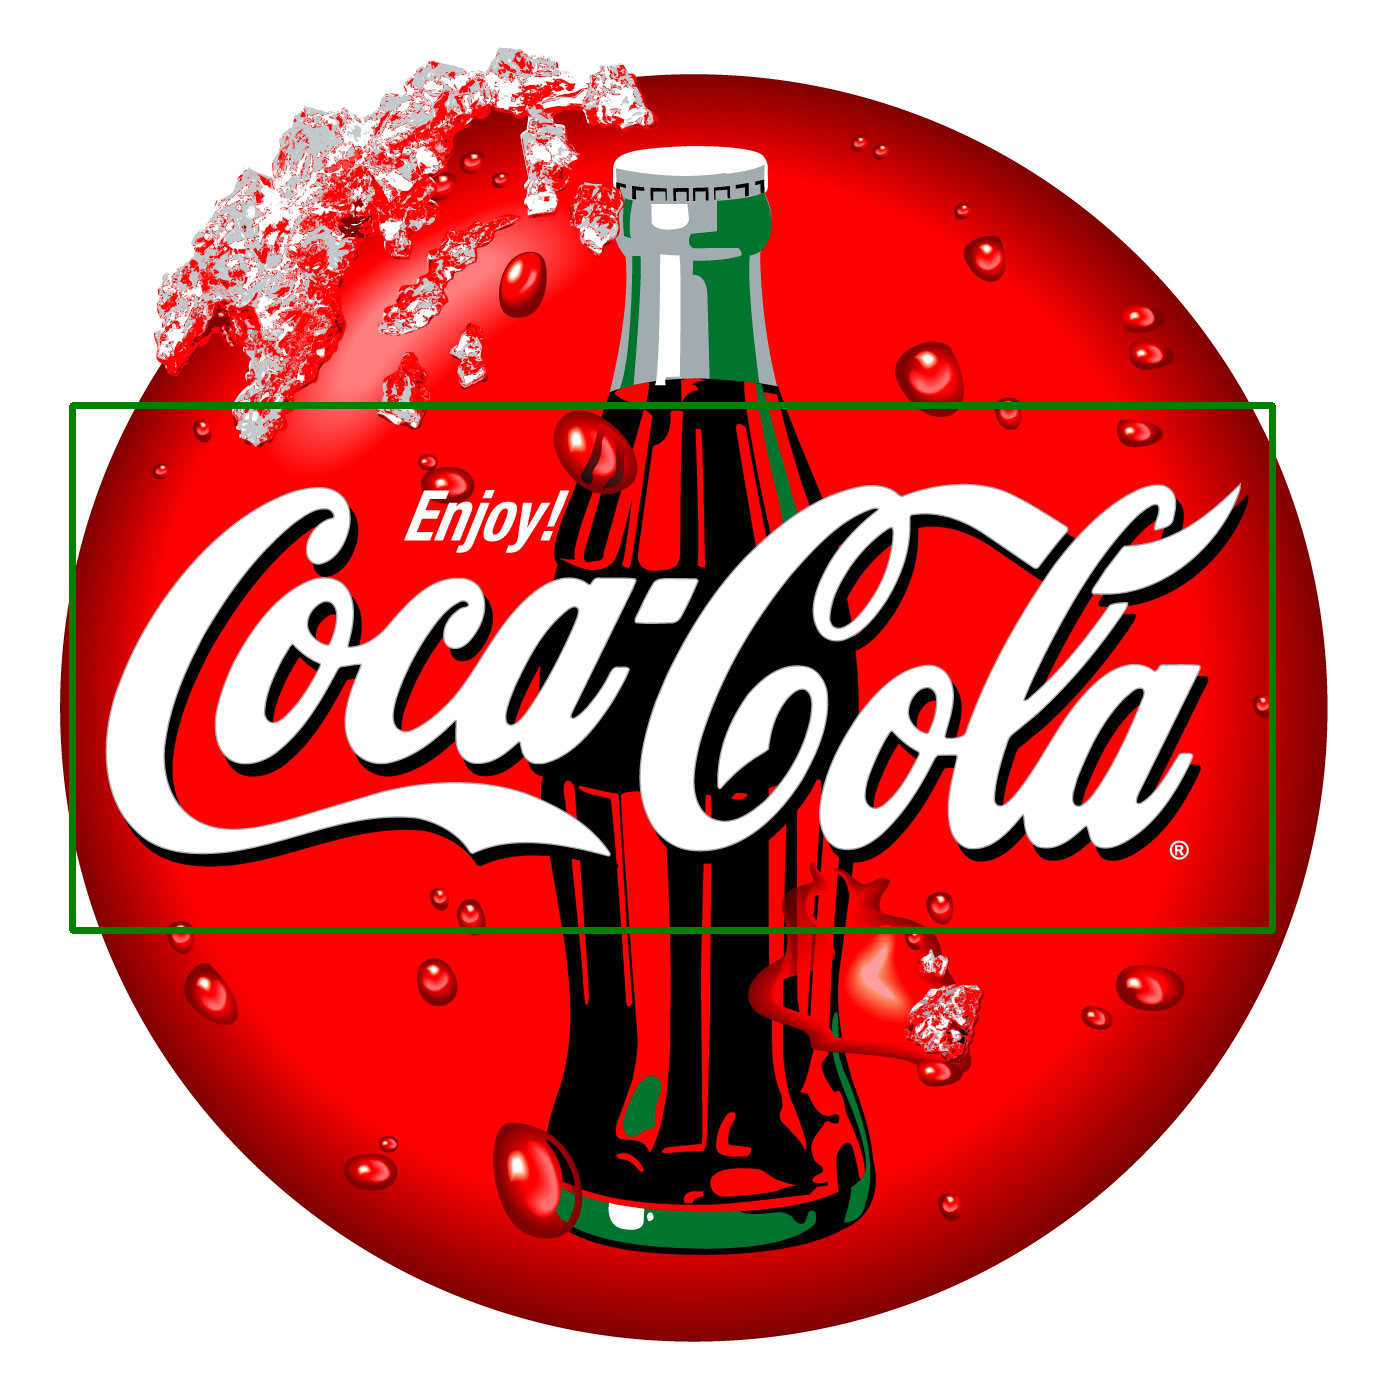

0.10777692496776581


In [61]:
img1 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/images/COCA-COLA-LOGO.jpg')
temp = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/template/pattern.png',0)
#Deteccion en imagen 1
img_salida = img1
img_p = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
img_p = cv.GaussianBlur(img_p, (5,5), 3)
img_p = cv.Canny(img_p, 100,200)
template = cv.GaussianBlur(temp, (5,5), 8)
template = cv.Canny(template,100,200)
results = None
scales = np.linspace(2.5, 3, 10)
resized_temp = list()

# generamos nuestra "piramide" de tamaños arbitrarios
for scale in scales[::-1]:
    resized_temp.append(cv.resize(template, None, fx=scale, fy=scale))

for temp in resized_temp:

    w, h = temp.shape[::-1]

    #Aplicamos la coincidencia de patrones
    res = cv.matchTemplate(img_p , temp, cv.TM_CCORR_NORMED)

    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    #top_left = max_loc
    #cv.rectangle(img_salida,top_left, bottom_right,color, 5)
    if results is None or max_val > results[0]:
        results = (max_val, max_loc, w, h)


if results is not None:
    max_val, max_loc, w, h = results
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida, top_left, bottom_right, (0, 128, 0), 5)
else:
    print("No se encontró ninguna coincidencia.")



cv2_imshow(img_salida)
print(max_val)




# **Imagen 2**

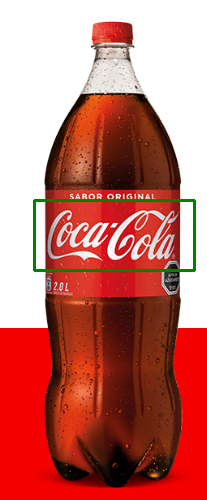

0.24651198089122772


In [67]:
img2 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/images/coca_logo_1.png')
temp = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/template/pattern.png',0)

#Deteccion en imagen 2
img = img2
img_p = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_p = cv.GaussianBlur(img_p, (5,5), 3)
img_p = cv.Canny(img_p, 100,200)
template = cv.GaussianBlur(temp, (3,3), 3)
template = cv.Canny(template,100,200)
results = None
scales = np.linspace(0.4, 1, 10)
resized_temp = list()


# generamos nuestra "piramide" de tamaños arbitrarios
for scale in scales[::-1]:
    resized_temp.append(cv.resize(template, None, fx=scale, fy=scale))


for temp in resized_temp:
    #print (temp.shape)
    img_salida = img.copy()
    if img_p.shape[1] >= temp.shape[1]:

        w, h = temp.shape[::-1]

        #Aplicamos la coincidencia de patrones
        res = cv.matchTemplate(img_p , temp, cv.TM_CCORR_NORMED)
        #print(max_val)
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        #top_left = max_loc
        #cv.rectangle(img_salida,top_left, bottom_right,color, 5)
        if results is None or max_val > results[0]:
            results = (max_val, max_loc, w, h)


if results is not None:
    max_val, max_loc, w, h = results
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img, top_left, bottom_right, (0, 128, 0), 2)
else:
    print("No se encontró ninguna coincidencia.")



cv2_imshow(img)
print(max_val)



# **Imagen 3**

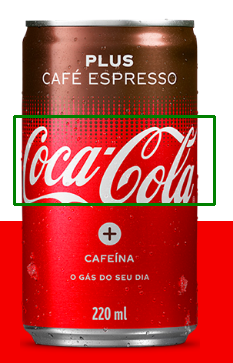

0.2028818130493164


In [69]:
img3 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/images/coca_logo_2.png')
temp = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/template/pattern.png',0)

#Deteccion en imagen 2
img = img3
img_p = cv.cvtColor(img3, cv.COLOR_RGB2GRAY)
img_p = cv.GaussianBlur(img_p, (5,5), 3)
img_p = cv.Canny(img_p, 100,200)
template = cv.GaussianBlur(temp, (3,3), 3)
template = cv.Canny(template,100,200)
results = None
scales = np.linspace(0.5, 1, 10)
resized_temp = list()

# generamos nuestra "piramide" de tamaños arbitrarios
for scale in scales[::-1]:
    resized_temp.append(cv.resize(template, None, fx=scale, fy=scale))


for temp in resized_temp:
    #print (temp.shape)

    if img_p.shape[1] >= temp.shape[1]:

        w, h = temp.shape[::-1]

        #Aplicamos la coincidencia de patrones
        res = cv.matchTemplate(img_p , temp, cv.TM_CCORR_NORMED)
        #print(max_val)
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        #top_left = max_loc
        #cv.rectangle(img_salida,top_left, bottom_right,color, 5)
        if results is None or max_val > results[0]:
            results = (max_val, max_loc, w, h)


if results is not None:
    max_val, max_loc, w, h = results
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img, top_left, bottom_right, (0, 128, 0), 2)
else:
    print("No se encontró ninguna coincidencia.")



cv2_imshow(img)
print(max_val)



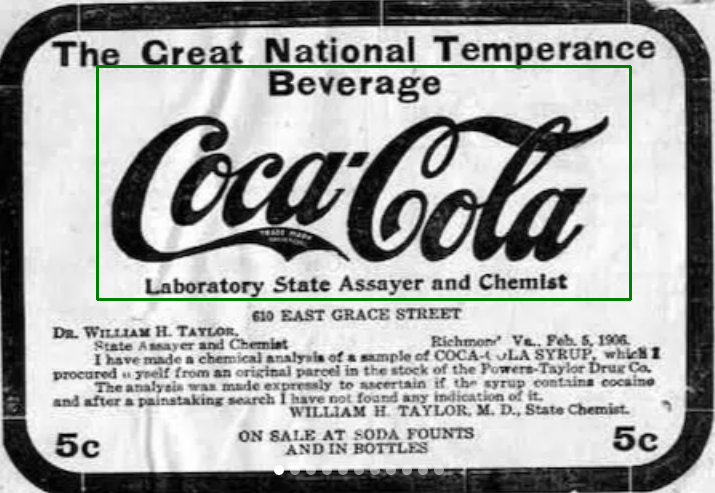

0.18053066730499268


In [64]:
img4 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/images/coca_retro_1.png')
temp = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/template/pattern.png',0)

#Deteccion en imagen 2
img_salida = img4
img_p = cv.cvtColor(img4, cv.COLOR_RGB2GRAY)
img_p = cv.GaussianBlur(img_p, (5,5), 3)
img_p = cv.Canny(img_p, 100,200)
template = cv.GaussianBlur(temp, (5,5), 8)
template = cv.Canny(template,100,200)
results = None
scales = np.linspace(1, 2, 10)
resized_temp = list()

#plt.figure()
#plt.imshow(img_p)


# generamos nuestra "piramide" de tamaños arbitrarios
for scale in scales[::-1]:

    resized_temp.append(cv.resize(template, None, fx=scale, fy=scale))


for temp in resized_temp:
    #print (temp.shape)

    if img_p.shape[1] >= temp.shape[1]:

        w, h = temp.shape[::-1]

        #Aplicamos la coincidencia de patrones
        res = cv.matchTemplate(img_p , temp, cv.TM_CCORR_NORMED)
        #print(max_val)
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        #top_left = max_loc
        #cv.rectangle(img_salida,top_left, bottom_right,color, 5)
        if results is None or max_val > results[0]:
            results = (max_val, max_loc, w, h)


if results is not None:
    max_val, max_loc, w, h = results
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida, top_left, bottom_right, (0, 128, 0), 2)
else:
    print("No se encontró ninguna coincidencia.")


cv2_imshow(img_salida)
print(max_val)



400 175
360 158
320 140
280 123
240 105
200 88
160 70
120 53
80 35
40 18


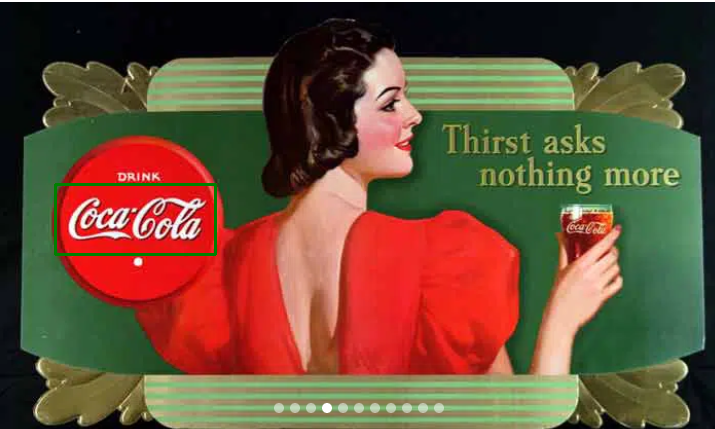

0.31864023208618164
160 70 (18, 40)


In [75]:
img5 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/images/coca_retro_2.png')
temp = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/template/pattern.png',0)

#Deteccion en imagen 2
img_salida = img5
img_p = cv.cvtColor(img5, cv.COLOR_RGB2GRAY)
img_p = cv.GaussianBlur(img_p, (5,5), 3)
img_p = cv.Canny(img_p, 100,200)
template = cv.GaussianBlur(temp, (3,3), 3)
template = cv.Canny(template,100,200)
results = None
scales = np.linspace(0.1, 1, 10)
resized_temp = list()

#plt.figure()
#plt.imshow(img_p)


# generamos nuestra "piramide" de tamaños arbitrarios
for scale in scales[::-1]:
    resized_temp.append(cv.resize(template, None, fx=scale, fy=scale))


for temp in resized_temp:
    #print (temp.shape)

    if img_p.shape[1] >= temp.shape[1]:

        w, h = temp.shape[::-1]
        print(w,h)
        #Aplicamos la coincidencia de patrones
        res = cv.matchTemplate(img_p , temp, cv.TM_CCORR_NORMED)
        #print(max_val)
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        #top_left = max_loc
        #cv.rectangle(img_salida,top_left, bottom_right,color, 5)
        if results is None or max_val > results[0]:
            results = (max_val, max_loc, w, h)


if results is not None:
    max_val, max_loc, w, h = results
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida, top_left, bottom_right, (0, 128, 0), 2)
else:
    print("No se encontró ninguna coincidencia.")


cv2_imshow(img_salida)
print(max_val)


print(w,h,temp.shape)

400 175
378 165
356 156
333 146
311 136
289 126
267 117
244 107
222 97
200 88


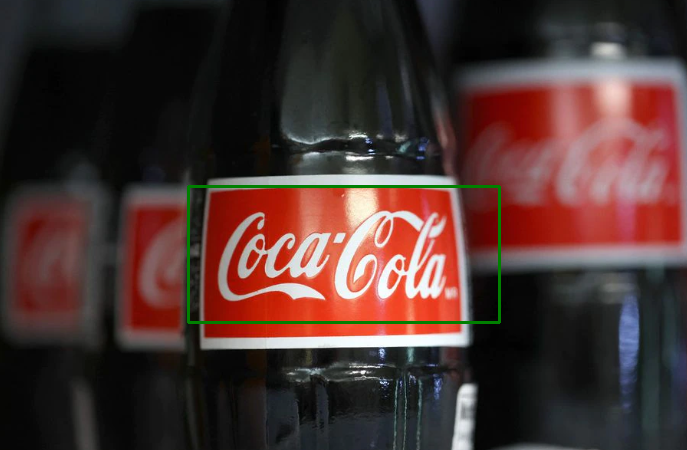

0.21169012784957886
311 136 (88, 200)


In [73]:
img6 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/images/logo_1.png')
temp = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/template/pattern.png',0)

#Deteccion en imagen 2
img_salida = img6
img_p = cv.cvtColor(img6, cv.COLOR_RGB2GRAY)
img_p = cv.GaussianBlur(img_p, (5,5), 3)
img_p = cv.Canny(img_p, 100,200)
template = cv.GaussianBlur(temp, (3,3), 3)
template = cv.Canny(template,100,200)
results = None
scales = np.linspace(0.5, 1, 10)
resized_temp = list()

#plt.figure()
#plt.imshow(img_p)


# generamos nuestra "piramide" de tamaños arbitrarios
for scale in scales[::-1]:
    resized_temp.append(cv.resize(template, None, fx=scale, fy=scale))


for temp in resized_temp:
    #print (temp.shape)

    if img_p.shape[1] >= temp.shape[1]:

        w, h = temp.shape[::-1]
        print(w,h)
        #Aplicamos la coincidencia de patrones
        res = cv.matchTemplate(img_p , temp, cv.TM_CCORR_NORMED)
        #print(max_val)
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        #top_left = max_loc
        #cv.rectangle(img_salida,top_left, bottom_right,color, 5)
        if results is None or max_val > results[0]:
            results = (max_val, max_loc, w, h)


if results is not None:
    max_val, max_loc, w, h = results
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida, top_left, bottom_right, (0, 128, 0), 2)
else:
    print("No se encontró ninguna coincidencia.")


cv2_imshow(img_salida)
print(max_val)

print(w,h,temp.shape)

# **Unificacion**

Ahora que obtuvimos una deteccion sin falsos positivos para cada imagen hagamos un codigo unificado que pueda recibir la lista de imagenes y detecte automaticamente el logo en cada una de ellas. Conocemos la combinacion de canny y filtro (su kernel y sigma) que hace que cada imagen pueda ser detectada, pero trataremos de utilizar un solo combo que funcione tan bien como se pueda para todas las imagenes y un reescalamiento adaptativo que varie segun si el template tiene que ser agrandado o achicado

In [248]:
import cv2 as cv
import numpy as np

# Cargamos las imagenes
img1 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/images/logo_1.png')
img2 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/images/coca_logo_1.png')
img3 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/images/coca_logo_2.png')
img4 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/images/coca_retro_1.png')
img5 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/images/coca_retro_2.png')
img6 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/images/COCA-COLA-LOGO.jpg')
template = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP3/Materiales/template/pattern.png')

#Armamos la lista con las imagenes para iterar
image_list = [img1, img2, img3, img4, img5, img6]

#Generamos el loop for que va a pasar de una imagen a otra
for img in image_list:
    img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    img_gray = cv.GaussianBlur(img_gray, (9, 9), 3)
    img_gray = cv.Canny(img_gray, 100, 200)

#Generamos la piramide de escalas
    scales = np.linspace(0.4, 3, 30)
    results = None

    for scale in scales[::-1]:
        resized_template = cv.resize(template, None, fx=scale, fy=scale)

        #Procesamos la imagen para un mejor matcheo
        resized_template_gray = cv.cvtColor(resized_template, cv.COLOR_RGB2GRAY)
        resized_template_gray = cv.GaussianBlur(resized_template_gray, (3, 3), 3)
        resized_template_gray = cv.Canny(resized_template_gray, 100, 200)

        #Corroboramos que la imagen sea mayor que el template para no tener errores
        if img_gray.shape[1] >= resized_template_gray.shape[1]:
            res = cv.matchTemplate(img_gray, resized_template_gray, cv.TM_CCORR)
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

        #Guardamos los resultados del mejor match
            if results is None or max_val > results[0]:
                results = (max_val, max_loc, resized_template.shape[1], resized_template.shape[0])

#Mostramos los resultados
    if results is not None:
        max_val, max_loc, w, h = results
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img, top_left, bottom_right, (0, 128, 0), 2)
        cv2_imshow(img)

        print(max_val)
    else:
        print("No se encontró ninguna coincidencia.")

Output hidden; open in https://colab.research.google.com to view.

# **Observaciones**

En este ejemplo vemos que logra encontrar el match con las 6 imagenes (alguna podria tener un mejor bounding box, pero dentro de todo es una buena deteccion)